In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.nn import ReLU
import sklearn.feature_extraction.text as sktext
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.decomposition as skd
from sklearn.preprocessing import StandardScaler
# Plotting
import matplotlib.pyplot as plt 
import seaborn as sns
import operator
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model
from scipy.stats import t

In [5]:
df = pd.read_csv('all_penalties.csv')
a
df = df[df.situation == 'all' ]
df.sort_values("gameId", inplace = True)
df.drop_duplicates(subset ="gameId")
df['delta'] = abs(df['penaltiesFor'] - df['penaltiesAgainst'])
df['total'] = abs(df['penaltiesFor'] + df['penaltiesAgainst'])
df = df.reset_index()
df = df.drop(columns=['index'])
df.to_csv('goodData.csv',index=False)
df

,team,season,name,gameId,opposingTeam,home_or_away,situation,penaltiesFor,penaltiesAgainst,delta,total
0,NYR,2008,NYR,2008020001,T.B,AWAY,all,4,7,3,11
1,T.B,2008,T.B,2008020001,NYR,HOME,all,7,4,3,11
2,PIT,2008,PIT,2008020002,OTT,AWAY,all,6,7,1,13
3,OTT,2008,OTT,2008020002,PIT,HOME,all,7,6,1,13
4,NYR,2008,NYR,2008020003,T.B,HOME,all,6,5,1,11
...,...,...,...,...,...,...,...,...,...,...,...
31645,NYI,2020,NYI,2020020767,N.J,AWAY,all,4,5,1,9
31646,WSH,2020,WSH,2020020769,PHI,AWAY,all,4,2,2,6
31647,PHI,2020,PHI,2020020769,WSH,HOME,all,2,4,2,6
31648,T.B,2020,T.B,2020020828,FLA,HOME,all,7,7,0,14


[10.54109589041096]


C:\Users\Gerrid\anaconda3\lib\site-packages\ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,team,season,name,gameId,opposingTeam,home_or_away,situation,penaltiesFor,penaltiesAgainst,delta,total
0,NYR,2008,NYR,2008020001,T.B,AWAY,all,4,7,3,11
1,T.B,2008,T.B,2008020001,NYR,HOME,all,7,4,3,11
2,PIT,2008,PIT,2008020002,OTT,AWAY,all,6,7,1,13
3,OTT,2008,OTT,2008020002,PIT,HOME,all,7,6,1,13
4,NYR,2008,NYR,2008020003,T.B,HOME,all,6,5,1,11
...,...,...,...,...,...,...,...,...,...,...,...
2623,PIT,2008,PIT,2008030415,DET,AWAY,all,9,2,7,11
2624,PIT,2008,PIT,2008030416,DET,HOME,all,2,2,0,4
2625,DET,2008,DET,2008030416,PIT,AWAY,all,2,2,0,4
2626,PIT,2008,PIT,2008030417,DET,AWAY,all,3,2,1,5


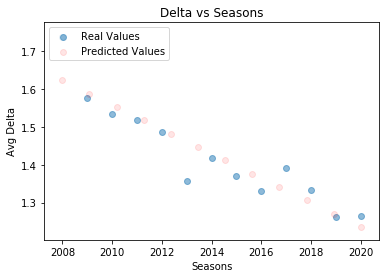

In [9]:
dfGood = pd.read_csv('goodData.csv')
df2008 = dfGood

df2008 = df2008[df2008.season == 2008 ]
avg2008 = df2008.delta.mean()
#df2008['avg'] = avg2008

df2009 = dfGood
df2009 = df2009[df2009.season == 2009 ]
avg2009 = df2009.delta.mean()
df2009 = df2009.reset_index()
df2009 = df2009.drop(columns=['index'])
#df2009['avg'] = avg2009

df2010 = dfGood
df2010 = df2010[df2010.season == 2010 ]
avg2010 = df2010.delta.mean()
df2009 = df2009.reset_index()
#df2010['avg'] = avg2010

df2011 = dfGood
df2011 = df2011[df2011.season == 2011 ]
avg2011 = df2011.delta.mean()
#df2011['avg'] = avg2011

df2012 = dfGood
df2012 = df2012[df2012.season == 2012 ]
avg2012 = df2012.delta.mean()
#df2012['avg'] = avg2012

df2013 = dfGood
df2013 = df2013[df2013.season == 2013 ]
avg2013 = df2013.delta.mean()
#df2013['avg'] = avg2013

df2014 = dfGood
df2014 = df2014[df2014.season == 2014 ]
avg2014 = df2014.delta.mean()
#df2014['avg'] = avg2014

df2015 = dfGood
df2015 = df2015[df2015.season == 2015 ]
avg2015 = df2015.delta.mean()
#df2015['avg'] = avg2015

df2016 = dfGood
df2016 = df2016[df2016.season == 2016 ]
avg2016 = df2016.delta.mean()
#df2016['avg'] = avg2016

df2017 = dfGood
df2017 = df2017[df2017.season == 2017 ]
avg2017 = df2017.delta.mean()
#df2017['avg'] = avg2017

df2018 = dfGood
df2018 = df2018[df2018.season == 2018 ]
avg2018 = df2018.delta.mean()
#df2018['avg'] = avg2018

df2019 = dfGood
df2019 = df2019[df2019.season == 2019 ]
avg2019 = df2019.delta.mean()
#df2019['avg'] = avg2019

df2020 = dfGood
df2020 = df2020[df2020.season == 2020 ]
avg2020 = df2020.delta.mean()
#df2020['avg'] = avg2020

avgDelta = np.array([avg2008, avg2009, avg2010, avg2011, avg2012, avg2013, avg2014, avg2015, avg2016, avg2017, avg2018, avg2019, avg2020])
seasons = np.array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
lr = sklearn.linear_model.LinearRegression()
x = seasons 
y= avgDelta
x = x.reshape(-1,1)
model = lr.fit(x,y)
newx = np.linspace(2008,2020,12)
newx = newx.reshape(-1,1)
newy = model.predict(newx)
plt.scatter(x, y, alpha = 0.5, label='Real Values')
plt.scatter(newx, newy, color='red', alpha = 0.1, label='Predicted Values')
plt.ylabel('Avg Delta')
plt.xlabel('Seasons')
plt.title('Delta vs Seasons')
plt.legend(loc="upper left")
df2008['total'] = df2008['penaltiesFor'] + df2008['penaltiesAgainst']
totalavg = []
totalavg.append(df2008.total.mean())
print(totalavg)
df2008

Training rsquared is  0.8878824174077974
Closest Residuals are  [ 0.03525325  0.0026361   0.00845699 -0.02640905  0.00664411 -0.0194774
 -0.02944526 -0.01284611 -0.00620902  0.0018473   0.00834577  0.02776911
  0.0034342 ]


,team,season,name,gameId,opposingTeam,home_or_away,situation,penaltiesFor,penaltiesAgainst
0,NYR,2008,NYR,2008020001,T.B,AWAY,5on4,1,0
1,NYR,2008,NYR,2008020003,T.B,HOME,5on4,1,0
2,NYR,2008,NYR,2008020010,CHI,HOME,5on4,0,0
3,NYR,2008,NYR,2008020019,PHI,AWAY,5on4,2,0
4,NYR,2008,NYR,2008020034,N.J,HOME,5on4,0,1
...,...,...,...,...,...,...,...,...,...
31645,L.A,2015,L.A,2015030185,S.J,HOME,5on4,0,0
31646,L.A,2017,L.A,2017030171,VGK,AWAY,5on4,0,0
31647,L.A,2017,L.A,2017030172,VGK,AWAY,5on4,0,0
31648,L.A,2017,L.A,2017030173,VGK,HOME,5on4,1,0


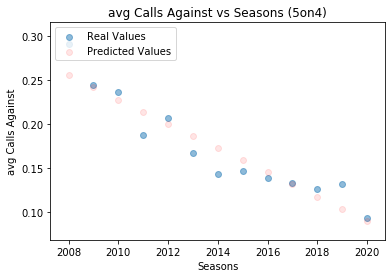

In [4]:
df5v4 = pd.read_csv('all_penalties.csv')
list = np.arange(0, 158250, 1).tolist()
df5v4 = df5v4[df5v4.situation == '5on4' ]
df5v4 = df5v4.reset_index()
df5v4 = df5v4.drop(columns=['index'])

df2008 = df5v4
df2008 = df2008 = df2008[df2008.season == 2008 ]
avg2008 = df2008.penaltiesAgainst.mean()
#df2008['avg'] = avg2008

df2009 = df5v4
df2009 = df2009[df2009.season == 2009 ]
avg2009 = df2009.penaltiesAgainst.mean()
df2009 = df2009.reset_index()
df2009 = df2009.drop(columns=['index'])
#df2009['avg'] = avg2009

df2010 = df5v4
df2010 = df2010[df2010.season == 2010 ]
avg2010 = df2010.penaltiesAgainst.mean()
df2009 = df2009.reset_index()
#df2010['avg'] = avg2010

df2011 = df5v4
df2011 = df2011[df2011.season == 2011 ]
avg2011 = df2011.penaltiesAgainst.mean()
#df2011['avg'] = avg2011

df2012 = df5v4
df2012 = df2012[df2012.season == 2012 ]
avg2012 = df2012.penaltiesAgainst.mean()
#df2012['avg'] = avg2012

df2013 = df5v4
df2013 = df2013[df2013.season == 2013 ]
avg2013 = df2013.penaltiesAgainst.mean()
#df2013['avg'] = avg2013

df2014 = df5v4
df2014 = df2014[df2014.season == 2014 ]
avg2014 = df2014.penaltiesAgainst.mean()
#df2014['avg'] = avg2014

df2015 = df5v4
df2015 = df2015[df2015.season == 2015 ]
avg2015 = df2015.penaltiesAgainst.mean()
#df2015['avg'] = avg2015

df2016 = df5v4
df2016 = df2016[df2016.season == 2016 ]
avg2016 = df2016.penaltiesAgainst.mean()
#df2016['avg'] = avg2016

df2017 = df5v4
df2017 = df2017[df2017.season == 2017 ]
avg2017 = df2017.penaltiesAgainst.mean()
#df2017['avg'] = avg2017

df2018 = df5v4
df2018 = df2018[df2018.season == 2018 ]
avg2018 = df2018.penaltiesAgainst.mean()
#df2018['avg'] = avg2018

df2019 = df5v4
df2019 = df2019[df2019.season == 2019 ]
avg2019 = df2019.penaltiesAgainst.mean()
#df2019['avg'] = avg2019

df2020 = df5v4
df2020 = df2020[df2020.season == 2020 ]
avg2020 = df2020.penaltiesAgainst.mean()


avgCallsAgainst = np.array([avg2008, avg2009, avg2010, avg2011, avg2012, avg2013, avg2014, avg2015, avg2016, avg2017, avg2018, avg2019, avg2020])

x = seasons
y = avgCallsAgainst
x = x.reshape(-1,1)
model = lr.fit(x,y)
newx = np.linspace(2008,2020,13)
newx = newx.reshape(-1,1)
newy = model.predict(newx)
plt.scatter(x, y, alpha = 0.5, label='Real Values')
newx = np.array([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.scatter(newx, newy, color='red', alpha = 0.1, label='Predicted Values')
plt.ylabel('avg Calls Against')
plt.xlabel('Seasons')
plt.title('avg Calls Against vs Seasons (5on4)')
plt.legend(loc="upper left")
rsquared = model.score(x,y)
print('Training rsquared is ',rsquared)
pred_values = []

#calculate residuals
pred_y = model.predict(x)    
Residuals = y - pred_y.T
print('Closest Residuals are ',Residuals)
df5v4

Training rsquared is  0.8834199659845748
Closest Residuals are  [ 0.03871833  0.00366652 -0.00520061 -0.00148419 -0.00170938 -0.0035789
 -0.04272239 -0.02383837 -0.0222147   0.00944308  0.01001346  0.01516828
  0.02373886]


,team,season,name,gameId,opposingTeam,home_or_away,situation,penaltiesFor,penaltiesAgainst
0,NYR,2008,NYR,2008020001,T.B,AWAY,4on5,0,0
1,NYR,2008,NYR,2008020003,T.B,HOME,4on5,0,0
2,NYR,2008,NYR,2008020010,CHI,HOME,4on5,1,1
3,NYR,2008,NYR,2008020019,PHI,AWAY,4on5,0,0
4,NYR,2008,NYR,2008020034,N.J,HOME,4on5,0,0
...,...,...,...,...,...,...,...,...,...
31645,L.A,2015,L.A,2015030185,S.J,HOME,4on5,1,0
31646,L.A,2017,L.A,2017030171,VGK,AWAY,4on5,0,0
31647,L.A,2017,L.A,2017030172,VGK,AWAY,4on5,0,0
31648,L.A,2017,L.A,2017030173,VGK,HOME,4on5,0,1


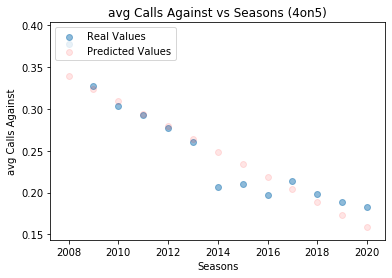

In [8]:
df4v5 = pd.read_csv('all_penalties.csv')
list = np.arange(0, 158250, 1).tolist()
df4v5 = df4v5[df4v5.situation == '4on5' ]
df4v5 = df4v5.reset_index()
df4v5 = df4v5.drop(columns=['index'])

df2008 = df4v5
df2008 = df2008 = df2008[df2008.season == 2008 ]
avg2008 = df2008.penaltiesAgainst.mean()
#df2008['avg'] = avg2008

df2009 = df4v5
df2009 = df2009[df2009.season == 2009 ]
avg2009 = df2009.penaltiesAgainst.mean()
df2009 = df2009.reset_index()
df2009 = df2009.drop(columns=['index'])
#df2009['avg'] = avg2009

df2010 = df4v5
df2010 = df2010[df2010.season == 2010 ]
avg2010 = df2010.penaltiesAgainst.mean()
df2009 = df2009.reset_index()
#df2010['avg'] = avg2010

df2011 = df4v5
df2011 = df2011[df2011.season == 2011 ]
avg2011 = df2011.penaltiesAgainst.mean()
#df2011['avg'] = avg2011

df2012 = df4v5
df2012 = df2012[df2012.season == 2012 ]
avg2012 = df2012.penaltiesAgainst.mean()
#df2012['avg'] = avg2012

df2013 = df4v5
df2013 = df2013[df2013.season == 2013 ]
avg2013 = df2013.penaltiesAgainst.mean()
#df2013['avg'] = avg2013

df2014 = df4v5
df2014 = df2014[df2014.season == 2014 ]
avg2014 = df2014.penaltiesAgainst.mean()
#df2014['avg'] = avg2014

df2015 = df4v5
df2015 = df2015[df2015.season == 2015 ]
avg2015 = df2015.penaltiesAgainst.mean()
#df2015['avg'] = avg2015

df2016 = df4v5
df2016 = df2016[df2016.season == 2016 ]
avg2016 = df2016.penaltiesAgainst.mean()
#df2016['avg'] = avg2016

df2017 = df4v5
df2017 = df2017[df2017.season == 2017 ]
avg2017 = df2017.penaltiesAgainst.mean()
#df2017['avg'] = avg2017

df2018 = df4v5
df2018 = df2018[df2018.season == 2018 ]
avg2018 = df2018.penaltiesAgainst.mean()
#df2018['avg'] = avg2018

df2019 = df4v5
df2019 = df2019[df2019.season == 2019 ]
avg2019 = df2019.penaltiesAgainst.mean()
#df2019['avg'] = avg2019

df2020 = df4v5
df2020 = df2020[df2020.season == 2020 ]
avg2020 = df2020.penaltiesAgainst.mean()


avgCallsAgainst = np.array([avg2008, avg2009, avg2010, avg2011, avg2012, avg2013, avg2014, avg2015, avg2016, avg2017, avg2018, avg2019, avg2020])

x = seasons
y = avgCallsAgainst
x = x.reshape(-1,1)
model = lr.fit(x,y)
newx = np.linspace(2008,2020,13)
newx = newx.reshape(-1,1)
newy = model.predict(newx)

plt.scatter(x, y, alpha = 0.5, label='Real Values')
newx = np.array([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.scatter(newx, newy, color='red', alpha = 0.1, label='Predicted Values')
plt.ylabel('avg Calls Against')
plt.xlabel('Seasons')
plt.title('avg Calls Against vs Seasons (4on5)')
plt.legend(loc="upper left")
rsquared = model.score(x,y)
print('Training rsquared is ',rsquared)
pred_values = []

#calculate residuals
pred_y = model.predict(x)    
Residuals = y - pred_y.T
print('Closest Residuals are ',Residuals)
df4v5